# 数据挖掘作业

## 题目1

蒙特卡洛方法可以用于产生接近pi的近似值。图1显示了一个带有1/4内切圆在内的边长为1的正方形。正方形的面积是1，该1/4圆的面积为pi/4。通过编程实现在这个正方形中产生均匀分布的点。落在圈内（红点）的点和总的投在正方形（红和绿点）上的点的比率给出了pi/4的近似值。这一过程称为使用蒙特卡洛方法来仿真逼近pi实际值。令N表示总的投在正方形的点。当投点个数分别是20, 50, 100, 200, 300, 500, 1000, 5000时，pi值分别是多少？对于每个N，每次实验算出pi值，重复这个过程20次，并在表中记下均值和方差。

In [1]:
# 初始化环境
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### 大致流程
模拟在 1 * 1 的区域上进行投点的过程，在圆内部的点通过红色的圆表示出来，在圆外部正方形内部的点通过三角形表示出来。

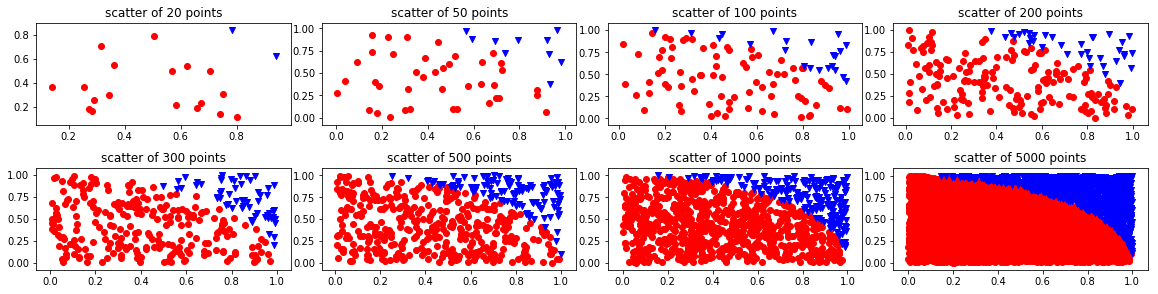

In [2]:
origin_x, origin_y, TIMES = 0, 0, 20
point_num_list = [20, 50, 100, 200, 300, 500, 1000, 5000]
mean_list = []
var_list = []
l = len(point_num_list);
col_num = 4
fig, axes = plt.subplots( l // col_num if l % col_num == 0 else l // col_num + 1 , col_num, figsize = (16, 4))
for idx, point_num in enumerate(point_num_list):
    pi_list = []
    for t in range(TIMES):
        X, Y = np.random.sample(point_num), np.random.sample(point_num)
        in_idx = (X ** 2 + Y ** 2) <= 1
        in_X, in_Y = X[in_idx], Y[in_idx]
        out_X, out_Y = X[~in_idx], Y[~in_idx]
        in_num, out_num = len(in_X), len(out_X)
        rate = float(in_num) / (in_num + out_num)
        # pi * r * r / 4 = r * r * rate => rate = 
        pi_list.append(4 * rate)
        if t == 0:
            cur_axes = axes[idx // col_num, idx % col_num]
            cur_axes.scatter(in_X, in_Y, color = 'r', marker = 'o')
            cur_axes.scatter(out_X, out_Y, color = 'b', marker = 'v')
            cur_axes.set_title("scatter of "+ str(point_num) + " points") 
    # print(pi_list)
    tmp = np.array(pi_list)
    mean_list.append(tmp.mean())
    var_list.append(tmp.var())
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

根据上面得到的结果，进行20次重复实验，记录每一次得到的落在内部的点和外部的点的比值 __rate__ ，可以计算出 Π，计算对应的均值和方差。根据公式 ： $ \pi * r^2 = rate * r ^ 2 $, 可以计算出 $\pi$ 的大小。根据结果，绘制相应的表格和柱状图如下。

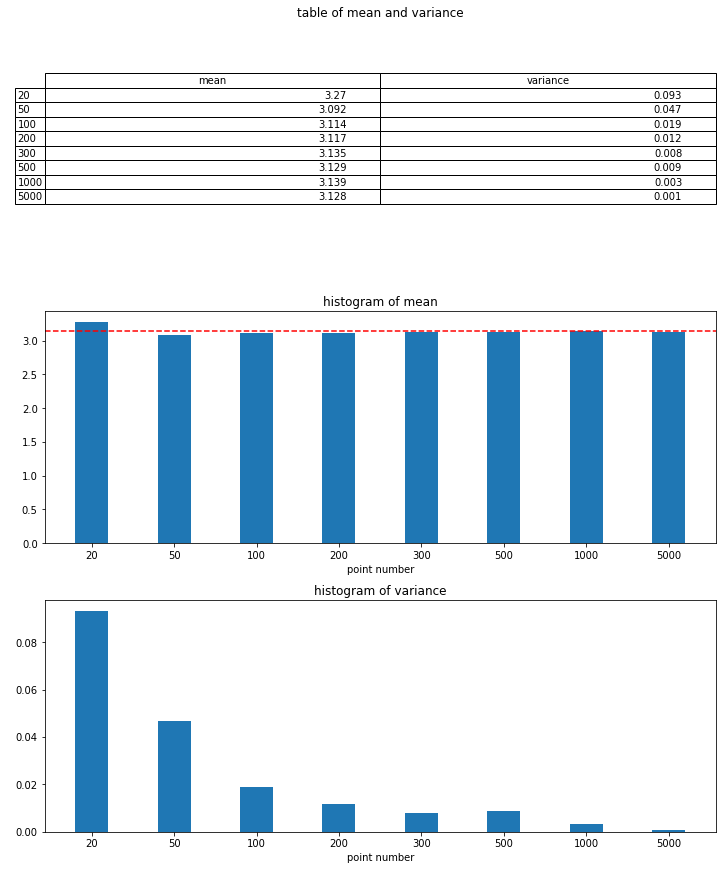

In [3]:
def draw(X, mean_list, var_list, gound_truth, x_axis_name):
    fig, axs =plt.subplots(3,1, figsize = (10,12))
    cell_text = np.vstack((np.array(mean_list, dtype = 'float64'), np.array(var_list, dtype = 'float64')))
    cell_text = np.around(cell_text, decimals = 3).T
    axs[0].axis('tight')
    axs[0].axis('off')
    axs[0].set_title("table of mean and variance")
    axs[1].set_title("histogram of mean")
    axs[2].set_title("histogram of variance")
    axs[1].set_xlabel(x_axis_name)
    axs[2].set_xlabel(x_axis_name)
    
    the_table = axs[0].table(cellText=cell_text,colLabels=["mean", "variance"], rowLabels=X, loc='center')
    x_pos = list(map(str, X))
    axs[1].bar(x_pos,mean_list, 0.4)
    if gound_truth:
        axs[1].axhline(gound_truth, ls='--', color='r')
    axs[2].bar(x_pos,var_list, 0.4)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
draw(point_num_list, mean_list, var_list, np.pi,"point number")

### 分析

- 首先是通过对 (x,y) 在 [-1 , 1] 在 uniform distribution 进行独立的随机采样获取对应点。

- 在表示均值的柱状图中，红色的线表示 $\pi$的真实值，可以看到，随着采样点的增加，均值越来越逼近真实值。

- 在表示方差的图中，可以看到随着采样点增加，方差越来越小。

## 题目二

### 题目描述
我们现在尝试通过蒙特卡洛的方法求解如下的积分：
$$\int_0^1 x^3 $$ 
该积分的求解我们可以直接求解，即有$\int_{x=0}^1 x^3 =1/4 $。如果你用蒙特卡洛的方法求解该积分，你认为x可以通过什么分布采样获得？如果采样次数是分别是N = 5, 10, 20, 30, 40, 50, 60, 70, 80, 100，积分结果有多好？对于每个采样次数N，重复蒙特卡洛过程100次，求出均值和方差，然后在表格中记录对应的均值和方差。

### 大致流程

使用蒙特卡洛方法来求解积分，x 通过在积分区间也就是 \[0, 1\] 的均匀分布（ uniform distribution）取得，实际上 x 的采样可以是从任意的分布中采样获得，只要我们知道这个分布的 pdf（概率密度函数）即可，应用 蒙特卡洛方法来求解。

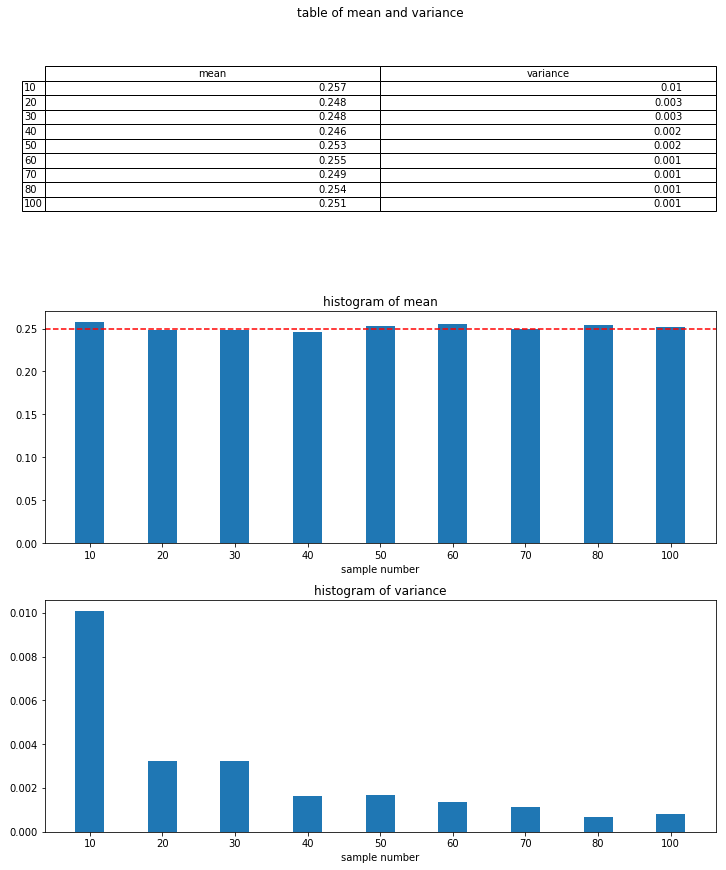

In [4]:
def ex2(samples_times):
    TIMES = 100
    lb, ub = 0.0, 1.0
    mean_list = []
    var_list = []
    for n in sample_times:
        res = []
        for t in range(TIMES):
            # sample data between lb and ub
            sp = (ub - lb) * np.random.sample(n) + lb
            sp = np.power(sp, 3)
            res.append(np.mean(sp) * (ub - lb))
        res = np.array(res)
        mean_list.append(np.mean(res))
        var_list.append(np.var(res))
    return mean_list, var_list
sample_times = [10, 20, 30, 40, 50, 60, 70, 80, 100]
mean, var = ex2(sample_times)
draw(sample_times,mean,var,0.25, "sample number")

### 分析

- 这是一个简单的一元积分，我们可以通过解析方法，求出这个积分的准确值，在均值的柱状图用红线标识出来，大致可以看出积分的效果还，和真实值相差不远。

- 在表示均值的柱状图中，随着采样点的增加，均值越来越逼近真实值。

- 在表示方差的图中，可以看到随着采样点增加，方差越来越小。 

## 题目三

### 题目描述
我们现在尝试通过蒙特卡洛的方法求解如下的更复杂的积分：

$$ \int_{x=2}^4\int_{y=-1}^1 f(x,y)= \frac{(y^2*e^{-y^2 }+x^4*e^{-x^2})}{x*e^{-x^2}}$$
你能够通过公式直接求解上述的积分吗？如果你用蒙特卡洛的方法求解该积分，你认为(x, y)可以通过什么分布采样获得？如果点（x, y）的采样次数是分别是N = 10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 500, 积分结果有多好？对于每个采样次数N，重复蒙特卡洛过程100次，求出均值和方差，然后在表格中记录对应的均值和方差。

### 大致流程

题目3 和 题目2 的大致流程相似，不过这个是一个二元积分，首先需要获取 (x, y)的采样点，这里采用的是和分别独立的在 x, y 的定义域内进行从均匀分布随机采样，获得采样点(x, y)。和第二题的一样，实际上也是可以从任意知道概率密度函数的分布中采样来获取采样点。

In [5]:
# 使用 scipy 获取积分的"正确" 值
from scipy import integrate
def my_func(x, y):
    y2, x2 = y * y, x * x
    return (y2 * np.exp(-1 * y2) + x2 * x2 * np.exp(-1 * x2)) /(x * np.exp(-1 * x2))
# get gound truth
gt_ex3, _ = integrate.nquad(my_func, [[2, 4], [-1,1]])

利用蒙特卡罗方法求解积分，同时根据要求记录均值和方差。

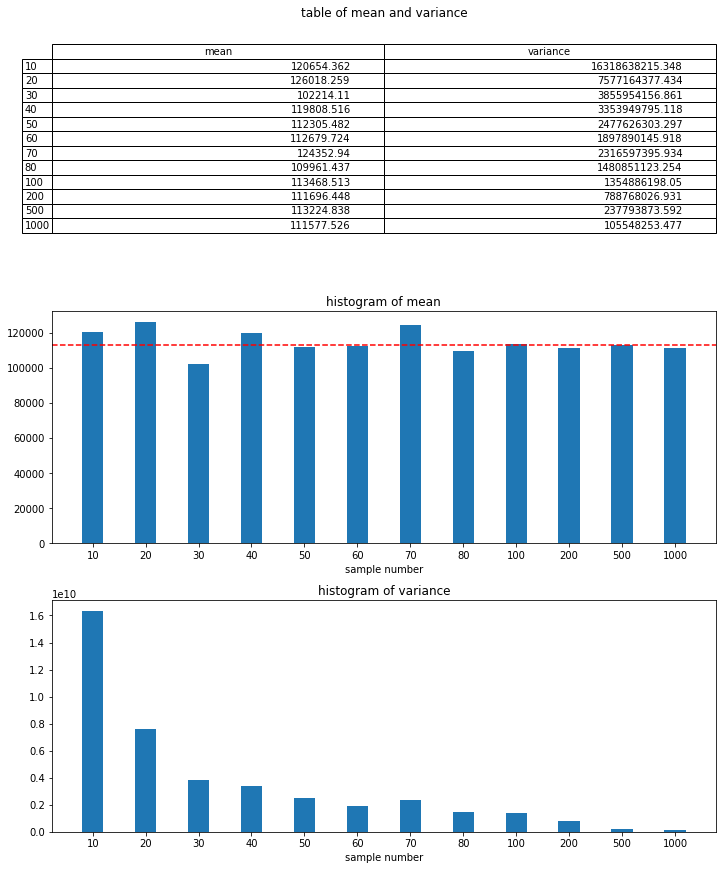

In [6]:
def random_bu(lb, ub, size):
    """
        random array between [lb, ub) with length of "size"
    """
    return (ub - lb) * np.random.sample(size) + lb

def ex3(sample_num_list):
    xlb, xub = 2, 4
    ylb, yub = -1, 1
    TIMES = 100
    base_area = abs((xub - xlb) * (yub - ylb))
    mean_list, var_list = [],[]
    for n in sample_num_list:
        res = []
        for t in range(TIMES):
            # using uniform sampling
            x = random_bu(xlb, xub, n)
            y = random_bu(ylb, yub, n)
            res.append(np.mean(my_func(x, y) * base_area))
        res = np.array(res)
        # print(res)
        mean_list.append(np.mean(res))
        var_list.append(np.var(res))
    return mean_list, var_list
sample_times = [10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 500, 1000]
mean, var = ex3(sample_times)
draw(sample_times,mean,var, gt_ex3, "sample number")

### 分析

- 这是一个比较复杂的二元积分，利用 scipy（科学计算库），获得一个相对准确积分值作为基准，在均值的柱状图用红线标识出来，用来显示蒙特卡洛方法的积分效果。

- 在表示均值的柱状图中，随着采样点的增加，均值越来越逼近真实值。

- 在表示方差的图中，可以看到随着采样点增加，方差越来越小。